# 4. 머신러닝(4) (06.25.목)

   - 참고: https://2-chae.github.io/category/1.ai/28

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg




from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

from sklearn.model_selection import cross_val_score    # 교차검증 할 때 쓰는 import
from sklearn.tree import DecisionTreeClassifier         # decisiontree import

### 사례3 : 손글씨 이미지

In [57]:
from sklearn.datasets import load_digits

mnist=load_digits()
mnist.data.shape
mnist.target

features, labels=mnist.data,mnist.target

In [58]:
# 교차검증

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def cross_validation(clf,features,labels):     #decisiontree 혹은 randomforest인지 넘겨받기위한 인자 필요
    cv_scores=[]
    
    for i in range(15): 
        scores= cross_val_score(clf,features,labels, scoring='accuracy',cv=10)     \
        #cv= 10 10번을 테스트, 훈련을 반복하면서 돌면서 가장 효과좋은 성능을 찾는다.
        cv_scores.append(scores.mean())
    
    return cv_scores    

In [59]:
df_cv_scores=cross_validation(DecisionTreeClassifier(),features,labels)
rf_cv_scores=cross_validation(RandomForestClassifier(),features,labels)

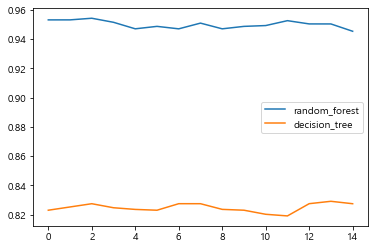

In [60]:
cv_list=[['random_forest',rf_cv_scores],['decision_tree',df_cv_scores]]

# df=pd.DataFrame.from_items(cv_list)
# df

df = pd.DataFrame({'random_forest' : rf_cv_scores, 'decision_tree' : df_cv_scores})
df.plot()

In [61]:
print(np.mean(df_cv_scores))
print(np.mean(rf_cv_scores))

0.8248017794330644
0.9500608317815021


## 사례4: 독버섯데이터

   + https://archive.ics.uci.edu/ml/index.php
   + https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data  # 데이터다운
   
   
   
   [컬럼 정보]   # 이런 것 좀 알려주시면서 했으면^^
   + classes: edible=e, poisonous=p
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [62]:
mr = pd.read_csv('data/mushrooms.csv', header = None)
mr.head()

# 컬럼 0 : target, 컬럼 1 ~ 22 : data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
mr.shape


mr.isnull().sum()

# null 값은 없넹!!

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [64]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [65]:
X = mr.drop(0, axis = 1)
y = mr[0]

In [66]:
from sklearn.preprocessing import LabelEncoder

le_x = LabelEncoder()
for col in X.columns:
    X[col] = le_x.fit_transform(X[col])

le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [67]:
X.head()

# 원래는 이 숫자가 각자 뭘 뜻하는 지 파악하고 있어야 해
# 근데 강사님은 하실 생각이 없지 ^^ 화난당 ㅎㅎ

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [68]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [69]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('정답률 :',accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1023
           1       1.00      1.00      1.00      1008

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [74]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier().fit(X_train, y_train)
pred4 = clf4.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred4))
print(classification_report(y_test, pred4))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1023
           1       1.00      1.00      1.00      1008

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [75]:
from sklearn.preprocessing import StandardScaler
# 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만듬(정규 분포)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)    # fit + transfrom -> train에다가만 할 것!
X_test = sc.transform(X_test)

In [76]:
X_train

array([[-0.84135099,  0.95814503, -0.20312723, ...,  1.41757315,
         0.28809337,  0.27943909],
       [-0.84135099, -1.47535963, -0.59841763, ..., -1.09703887,
         0.28809337,  1.44005419],
       [-0.84135099, -1.47535963, -0.20312723, ..., -0.67793687,
         1.0777258 , -0.88117602],
       ...,
       [ 1.02980788,  0.95814503, -0.99370802, ...,  1.41757315,
         0.28809337, -0.88117602],
       [ 1.02980788, -1.47535963, -0.20312723, ..., -0.25883487,
        -0.50153906, -0.30086847],
       [ 1.02980788,  0.95814503, -0.99370802, ...,  1.41757315,
         0.28809337,  1.44005419]])

In [77]:
X_test

array([[ 1.02980788,  0.95814503, -0.20312723, ..., -0.67793687,
         0.28809337, -0.88117602],
       [ 1.02980788, -1.47535963, -0.20312723, ..., -0.25883487,
         0.28809337, -0.88117602],
       [ 1.02980788, -1.47535963,  1.77332474, ..., -1.09703887,
         1.0777258 , -0.30086847],
       ...,
       [ 1.02980788,  0.95814503,  1.77332474, ..., -0.25883487,
        -1.29117149,  0.85974664],
       [-0.84135099,  0.95814503, -0.20312723, ..., -0.67793687,
         0.28809337, -0.88117602],
       [ 1.02980788,  0.14697681,  1.37803434, ..., -1.09703887,
        -0.50153906,  2.02036175]])

In [78]:
clf5 = LogisticRegression().fit(X_train, y_train)
pred5 = clf5.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

정답률 : 0.9601181683899557
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1023
           1       0.96      0.96      0.96      1008

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [79]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X, columns=X.columns, drop_first=True)   # 한번만 실행할 것

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)    # fit + transfrom -> train에다가만 할 것!
X_test = sc.transform(X_test)


In [80]:
clf6 = LogisticRegression().fit(X_train, y_train)
pred6 = clf6.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred6))
print(classification_report(y_test, pred6))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1051
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Gradient Boosting Regression Tree

   + 회귀와 분류에서 모두 사용
   + 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사 하강법)
   + 강력한 사전 가지치기 사용
   + 랜덤 포레스트보다 매개변수 설정에 민감
   + learning_rate를 사용하여 오차 보정
   + XG Boost, LightGBM

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [82]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

In [83]:
# 깊이 : 3, 트리의 갯수 : 100, learning_rate = 0.1 (default 값)
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print('훈련 정확도 :', tree.score(X_train, y_train))
print('테스트 정확도 :', tree.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.958041958041958


In [84]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)  # 과대적합 방지(max_depth 설정)

print('훈련 정확도 :', tree.score(X_train, y_train))
print('테스트 정확도 :', tree.score(X_test, y_test))

훈련 정확도 : 0.9906103286384976
테스트 정확도 : 0.965034965034965


In [85]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)   # 경사 하강 기울기 설정

print('훈련 정확도 :', tree.score(X_train, y_train))
print('테스트 정확도 :', tree.score(X_test, y_test))

훈련 정확도 : 0.9929577464788732
테스트 정확도 : 0.958041958041958


# 5. 전처리

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','믹서']

encoder=LabelEncoder()
encoder.fit(items)

print('인코딩클래스: ', encoder.classes_)

labels=encoder.transform(items)
print('인코딩변환값: ', labels)


print('디코딩 원본값:', encoder.inverse_transform([0,1,4,5,3,3,2,2]))

인코딩클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
인코딩변환값:  [0 1 4 5 3 2 2]
디코딩 원본값: ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','믹서']

encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

labels=labels.reshape(-1,1)



oh=OneHotEncoder()
oh.fit(labels)
oh_labels=oh.transform(labels)
print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(7, 6)


In [90]:
# 원핫 인코더    -> 이게 무엇?

df=pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


## 피처 스케일링(feature scaling)
     + 표준화(Standardization)
          - 피처 각각의 평균이 0이고 분산이 1인 표준정규분포를 가진 값으로 변환
     
     + 정규화(Normalization)
          - 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념

### StandardScaler

In [91]:
from sklearn.datasets import load_iris
iris=load_iris()

In [92]:
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [93]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [94]:
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler  (정규분포가 아닐 떄 사용해보는 것?)

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [97]:
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print(iris_df_scaled.min())
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 교차검증
   - 참고: https://2-chae.github.io/category/1.ai/28
   - K-Fold Cross Validation
   - KFold, StratifiedKFold

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [99]:
iris=load_iris()
features=iris.data
label=iris.target
df_clf=DecisionTreeClassifier(random_state=156)

In [100]:
kfold=KFold(n_splits=5)


cv_accuracy=[]
n_iter=0

for train_index, test_index in kfold.split(features):
    # 교차검증을 위해서 디테일하게 나눠준다.
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    
    n_iter+= 1
    # 여기까지. 5번 반복을 돌면서 훈련과 검증을 반복한 뒤 예측을 pred에 저장.
    
    accuracy = accuracy_score(y_test, pred)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0},{1},{2},{3}".format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증셋 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
print('\n평균 검증 정확도: ', np.mean(cv_accuracy))    


#1,1.0,120,30

#1 검증셋 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2,0.9666666666666667,120,30

#2 검증셋 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3,0.8666666666666667,120,30

#3 검증셋 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4,0.9333333333333333,120,30

#4 검증셋 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5,0.7333333333333333,120,30

#5 검증셋 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도:  0.9


In [101]:
iris=load_iris()


iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [102]:
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
0    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    30
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
1    40
0    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    20
1    10
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    50
0    50
1    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    30
Name: label, dtype: int64
## 교차 검증: 4
학습 레이블 데이터 분포:
 0    50
1    40
2    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    20
1    10
Name: label, dtype: int64
## 교차 검증: 5
학습 레이블 데이터 분포:
 1    50
0    50
2    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    30
Name: label, dtype: int64


In [103]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

n_iter =0
for train_index, test_index  in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter), '\n')
    print('학습 레이블 데이터 분포:\n', label_train.value_counts(), '\n')
    print('검증 레이블 데이터 분포:\n', label_test.value_counts(), '\n\n')

## 교차 검증: 1 

학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64 


## 교차 검증: 2 

학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64 


## 교차 검증: 3 

학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64 




In [104]:
df_clf=DecisionTreeClassifier(random_state=156)


kfold=KFold(n_splits=5)


cv_accuracy=[]
n_iter=0

for train_index, test_index in kfold.split(features):
    # 교차검증을 위해서 디테일하게 나눠준다.
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    
    n_iter+= 1
    # 여기까지. 5번 반복을 돌면서 훈련과 검증을 반복한 뒤 예측을 pred에 저장.
    
    accuracy = accuracy_score(y_test, pred)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0},{1},{2},{3}".format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증셋 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
print('\n평균 검증 정확도: ', np.mean(cv_accuracy))    


#1,1.0,120,30

#1 검증셋 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2,0.9666666666666667,120,30

#2 검증셋 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3,0.8666666666666667,120,30

#3 검증셋 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4,0.9333333333333333,120,30

#4 검증셋 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5,0.7333333333333333,120,30

#5 검증셋 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도:  0.9


In [105]:
from sklearn.model_selection import cross_val_score

In [111]:
iris_data=load_iris()
df_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

scores=cross_val_score(df_clf,data,label,scoring='accuracy',cv=3)
print('\n평균 검증 정확도: ', np.mean(scores))   


평균 검증 정확도:  0.9666666666666667


## GridSearchCV (핸즈온 P.115)

In [112]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [113]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=121)
dtree = DecisionTreeClassifier()

In [114]:
params={'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [118]:
grid_dtree=GridSearchCV(dtree,param_grid=params,refit=True,scoring='accuracy',cv=3)

In [119]:
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},

In [120]:
# 결과 확인하기 - 데이터프레임으로 처리해보자.
scores_df=pd.DataFrame(grid_dtree.cv_results_)
                       # 결과가 저장되어있는 변수. (자동저장)

scores_df[["params","mean_test_score","rank_test_score"]]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


In [121]:
print('최적 파라미터: ', grid_dtree.best_params_)
print('최고 정확도: ', grid_dtree.best_score_)

최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
최고 정확도:  0.975


In [122]:
estimator=grid_dtree.best_estimator_
pred=estimator.predict(X_test)
print('테스트정확도:',accuracy_score(y_test,pred))

테스트정확도: 0.9666666666666667
